In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import requests

                goog
date                
2019-07-05  1.000000
2019-07-08  0.986532
2019-07-09  0.994026
2019-07-10  1.007856
2019-07-11  1.011152
2019-07-12  1.011762
2019-07-15  1.016570
2019-07-16  1.019433
2019-07-17  1.013044
2019-07-18  1.013026
2019-07-19  0.998683
2019-07-22  1.005726
2019-07-23  1.012920
2019-07-24  1.005497
2019-07-25  1.000468
2019-07-26  1.105003
2019-07-29  1.095282
2019-07-30  1.082671
2019-07-31  1.075195
2019-08-01  1.068417
2019-08-02  1.055144
2019-08-05  1.018319
2019-08-06  1.033899
2019-08-07  1.037469
2019-08-08  1.064697
2019-08-09  1.049859
2019-08-12  1.038106
2019-08-13  1.058042
2019-08-14  1.028897
2019-08-15  1.031522
...              ...
2019-08-22  1.051202
2019-08-23  1.017409
2019-08-26  1.032962
2019-08-27  1.032035
2019-08-28  1.034845
2019-08-29  1.054136
2019-08-30  1.049939
2019-09-03  1.032521
2019-09-04  1.044027
2019-09-05  1.070511
2019-09-06  1.064811
2019-09-09  1.064352
2019-09-10  1.065757
2019-09-11  1.078279
2019-09-12  1

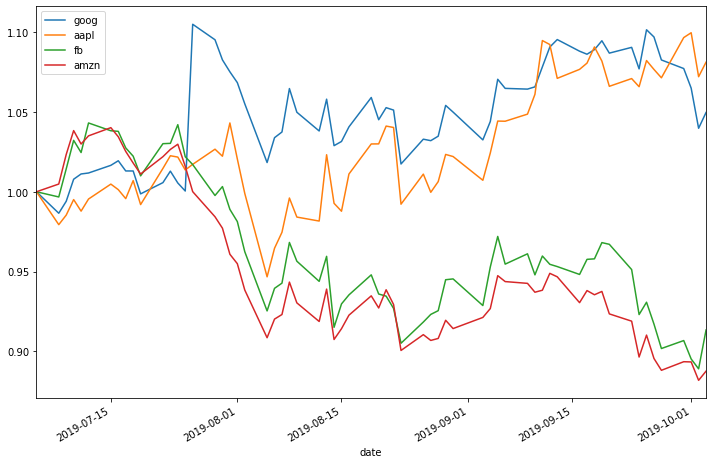

In [24]:
stocks = ["goog", "aapl", "fb", "amzn"]
public_api_key = "pk_ca08755813c6498f9a87b6e5897ebc86"

stocks_df = None
for stock in stocks:
    data = requests.get(f"https://cloud.iexapis.com/stable/stock/{stock}/chart/3m?token={public_api_key}").json()
    stock_df = pd.DataFrame.from_dict(data)
    stock_df['date'] = pd.to_datetime(stock_df['date'], format="%Y-%m-%d")
    stock_df = stock_df.set_index('date')
    stock_df = stock_df[["close"]]
    stock_df.columns = [ stock ]
    stock_df = stock_df / stock_df[stock][0] # Normalization at t=0
    print(stock_df)
    if stocks_df is None:
        stocks_df = stock_df
    else:
        stocks_df = stocks_df.join(stock_df)

stocks_df.plot(figsize=(12,8))

In [18]:
stock_df = pd.DataFrame.from_dict(data)
print(stock_df)

    change  changeOverTime  changePercent    close        date     high  \
0     0.00        0.000000         0.0000  1942.91  2019-07-05  1945.90   
1     9.41        0.004843         0.4843  1952.32  2019-07-08  1956.00   
2    35.98        0.023362         1.8429  1988.30  2019-07-09  1990.01   
3    29.11        0.038345         1.4641  2017.41  2019-07-10  2024.94   
4   -16.34        0.029934        -0.8099  2001.07  2019-07-11  2035.80   
5     9.93        0.035045         0.4962  2011.00  2019-07-12  2017.00   
6     9.99        0.040187         0.4968  2020.99  2019-07-15  2022.90   
7   -11.09        0.034479        -0.5487  2009.90  2019-07-16  2026.31   
8   -17.87        0.025282        -0.8891  1992.03  2019-07-17  2012.00   
9   -14.13        0.018009        -0.7093  1977.90  2019-07-18  1987.50   
10  -13.38        0.011122        -0.6765  1964.52  2019-07-19  1996.00   
11   21.11        0.021988         1.0746  1985.63  2019-07-22  1989.00   
12    8.86        0.02654

In [10]:
print(data)

[{'date': '2019-07-05', 'open': 1928.6, 'close': 1942.91, 'high': 1945.9, 'low': 1925.3, 'volume': 2628359, 'uOpen': 1928.6, 'uClose': 1942.91, 'uHigh': 1945.9, 'uLow': 1925.3, 'uVolume': 2628359, 'change': 0, 'changePercent': 0, 'label': 'Jul 5, 19', 'changeOverTime': 0}, {'date': '2019-07-08', 'open': 1934.12, 'close': 1952.32, 'high': 1956, 'low': 1928.25, 'volume': 2883371, 'uOpen': 1934.12, 'uClose': 1952.32, 'uHigh': 1956, 'uLow': 1928.25, 'uVolume': 2883371, 'change': 9.41, 'changePercent': 0.4843, 'label': 'Jul 8, 19', 'changeOverTime': 0.004843}, {'date': '2019-07-09', 'open': 1947.8, 'close': 1988.3, 'high': 1990.01, 'low': 1943.47, 'volume': 4345698, 'uOpen': 1947.8, 'uClose': 1988.3, 'uHigh': 1990.01, 'uLow': 1943.47, 'uVolume': 4345698, 'change': 35.98, 'changePercent': 1.8429, 'label': 'Jul 9, 19', 'changeOverTime': 0.023362}, {'date': '2019-07-10', 'open': 1996.51, 'close': 2017.41, 'high': 2024.94, 'low': 1995.4, 'volume': 4931902, 'uOpen': 1996.51, 'uClose': 2017.41, '

In [20]:
stock_df = stock_df["close"]
print(stock_df)

0     1942.91
1     1952.32
2     1988.30
3     2017.41
4     2001.07
5     2011.00
6     2020.99
7     2009.90
8     1992.03
9     1977.90
10    1964.52
11    1985.63
12    1994.49
13    2000.81
14    1973.82
15    1943.05
16    1912.45
17    1898.53
18    1866.78
19    1855.32
20    1823.24
21    1765.13
22    1787.83
23    1793.40
24    1832.89
25    1807.58
26    1784.92
27    1824.34
28    1762.96
29    1776.12
       ...   
34    1805.60
35    1749.62
36    1768.87
37    1761.83
38    1764.25
39    1786.40
40    1776.29
41    1789.84
42    1800.62
43    1840.72
44    1833.51
45    1831.35
46    1820.55
47    1822.99
48    1843.55
49    1839.34
50    1807.84
51    1822.55
52    1817.46
53    1821.50
54    1794.16
55    1785.30
56    1741.61
57    1768.33
58    1739.84
59    1725.45
60    1735.91
61    1735.65
62    1713.23
63    1724.42
Name: close, Length: 64, dtype: float64


In [29]:
stock_df.columns = [ stock ]
[ stock ]

['amzn']